# A company has provided the data of its top most customers who have purchased products from the company. It wants to know patterns in the data to understand its potential customer and also wants to know the areas which it needs to stress to increase its selling.



Major takeaways frrom the analysis:  
1.  The data is prepared for the analysis by following numerous checks such as null value check, duplicate rows check, outlier check,  erroneous data standardization etc.
2. Data has been derived from the existing columns when and where required.
3.  The list of top customers have been found and shown.
4.  The age group of 26-35 by far exceeds the amount of purchasing compared to other age groups.
5. The frequency of purchase and total purchase by individual users are highly correlated.
6. The net purchase amounts are highly skewed towards Male.  The number of purchase by male and female are exactly same but the amount of purchase is quite small for females. The retail company might want to think about tapping the potential buyers in females and design products as well as marketing and pricing strategy accordingly
7. Customers who have come to the city in last one year have purchased the most which, by far exceeds the purchase amounts of others in the category. Further City_Category B has given the most purchases to the company.
8. Occupation levels 4,0,and 7 are the most spender who bought the products where as occupation level 8 is the least spender
9. product category number 1 has been purchased the most whereas purchases from products of product categories 7, 9, 12 &18 are quite small comparatively.
10. P00025442,	P00110742	 and	P00255842 are the top three purchased products
11. P00353042,	P00309042 and	P00091742 are the top three least selling products

In [23]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
#loading the data into a dataframe
df = pd.read_csv('C:/Users/Vinod Jha/Desktop/Data Analysis Projects/Black Friday Sale/train.csv')

In [3]:
#checking first 5 entries in all the columns of 
df.head(40)
#Takeaways: One user ha ordered multiple products. There are many NULL values in product_category_3 and prodduct_category_2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.shape

(550068, 12)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Since one user has purchased multiple times, it will be beter to have a user specific dataframe and many columns are user specific
One derived metric "number_purchases" has to be vreated which will keep the track of number of purchases made my a single user

Before going for standardization of the data,it is needed to treat the missing values and wrong entries if any.
the unique values of the categorical variables is being checked:

In [7]:
df.Gender.unique()
#it has 2 unique values as shown below

array(['F', 'M'], dtype=object)

In [82]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [8]:
df.Age.unique()
#It has 7 unique entries each pertaining to a range of ages of customers

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [10]:
df.Marital_Status.unique()

array([0, 1], dtype=int64)

In [11]:




df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [12]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [13]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [14]:
#This column has already been standerdized and convered to numeric
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [15]:
df.User_ID.unique().shape
#So there are 5891 unique users who have purchased items ate various instances. To know about their repeated behaiviour of purchasing a product it is necessary to keep this coloumn
#

(5891,)

In [16]:
df.Product_ID.unique().shape
#There are 3631 different products available with the superstore. To knoe if the user has repeated the product or not, 
#this column will be required. 

(3631,)

In [17]:
df.head(10)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


Further one productID is listed in all three categories. This is possible as some products can be listed in 
more than  one categories e.g. a refrigerator can be listed in Electronics as well as home accessories.
To know the exact reason, the Product columns will be explored more

In [191]:
df2 = df[['Product_ID', 'Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]
df2

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,3,NaN,NaN,8370
1,P00248942,1,6.0,14.0,15200
2,P00087842,12,NaN,NaN,1422
3,P00085442,12,14.0,NaN,1057
4,P00285442,8,NaN,NaN,7969
...,...,...,...,...,...
550063,P00372445,20,NaN,NaN,368
550064,P00375436,20,NaN,NaN,371
550065,P00375436,20,NaN,NaN,137
550066,P00375436,20,NaN,NaN,365


In [19]:
df2.loc[df2.Product_ID=='P00069042']

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,3,NaN,NaN
825,P00069042,3,NaN,NaN
3314,P00069042,3,NaN,NaN
4224,P00069042,3,NaN,NaN
5864,P00069042,3,NaN,NaN
...,...,...,...,...
539484,P00069042,3,NaN,NaN
540849,P00069042,3,NaN,NaN
543419,P00069042,3,NaN,NaN
544454,P00069042,3,NaN,NaN


In [20]:
df2.loc[df2.Product_ID=='P00248942']

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
1,P00248942,1,6.0,14.0
126,P00248942,1,6.0,14.0
405,P00248942,1,6.0,14.0
516,P00248942,1,6.0,14.0
701,P00248942,1,6.0,14.0
...,...,...,...,...
542905,P00248942,1,6.0,14.0
544481,P00248942,1,6.0,14.0
545091,P00248942,1,6.0,14.0
545123,P00248942,1,6.0,14.0


The above two examples show that the products sometimes belong to multiple category. And therefor category_2 and category_3 are 
NULL values.and NULL values cannot be replaced by any interpolation in this case
checking if other columns have null values

In [21]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

As oberseved earlier, only 2 columns have NULL values. And they are present because many products are listed in only
one or two Product category
they will be treated for NA values as and when reuqired
Lets reduce the size of the dataframe by concatinating the different entries of unique User_ID

In [22]:

number_of_purchase = df['User_ID'].value_counts().sort_index()
number_of_purchase

1000001     35
1000002     77
1000003     29
1000004     14
1000005    106
          ... 
1006036    514
1006037    122
1006038     12
1006039     74
1006040    180
Name: User_ID, Length: 5891, dtype: int64

In [25]:
df_user = df.groupby('User_ID')['Purchase'].sum()
df_user

User_ID
1000001     334093
1000002     810472
1000003     341635
1000004     206468
1000005     821001
            ...   
1006036    4116058
1006037    1119538
1006038      90034
1006039     590319
1006040    1653299
Name: Purchase, Length: 5891, dtype: int64

In [35]:
prchase_per_user = pd.DataFrame({'User_ID':df_user.index[:],'number_of_purchase':number_of_purchase.values[:],'total_purchase_count': 
                                df_user.values[:]})

In [68]:
prchase_per_user=prchase_per_user.sort_values(by='number_of_purchase',ascending=False)
prchase_per_user=prchase_per_user.reset_index(drop=True)
prchase_per_user
#the list of users having done most number of purchases has been shown

,User_ID,number_of_purchase,total_purchase_count
0,1001680,1026,8699596
1,1004277,979,10536909
2,1001941,898,6817493
3,1001181,862,6387961
4,1000889,823,5499872
...,...,...,...
5886,1002111,7,54536
5887,1005391,7,60182
5888,1002690,7,87789
5889,1005608,7,61628


In [72]:
#the top 20 users having done the purchase most number of times:
prchase_per_user[:20]

,User_ID,number_of_purchase,total_purchase_count
0,1001680,1026,8699596
1,1004277,979,10536909
2,1001941,898,6817493
3,1001181,862,6387961
4,1000889,823,5499872
5,1003618,767,5962012
6,1001150,752,4728932
7,1001015,740,6511314
8,1005795,729,5464535
9,1005831,727,6512433


In [77]:
#top 20 purchasers according to purchase values
prchase_per_user.sort_values(by='total_purchase_count',ascending=False)[:20]

,User_ID,number_of_purchase,total_purchase_count
1,1004277,979,10536909
0,1001680,1026,8699596
10,1002909,718,7577756
2,1001941,898,6817493
16,1000424,694,6573609
31,1004448,575,6566245
9,1005831,727,6512433
7,1001015,740,6511314
14,1003391,698,6477160
3,1001181,862,6387961


<AxesSubplot:xlabel='User_ID', ylabel='Purchase'>

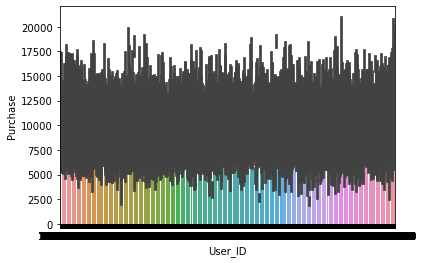

In [79]:
sns.barplot(x='User_ID',y='Purchase',data = df)

In [ ]:
## This plot doesnt give us much of informations except that there are no extreme top purchasers.

In [81]:
#checking for duplicate rows
df.duplicated().sum()

#So we don't have any duplicated entry

0

In [86]:
#The data is clean and the entries to each column is logical. The purchase data may contain some outlier. 
df.Purchase.sort_values(ascending=False)[:20]

370891    23961
93016     23961
87440     23961
503697    23960
321782    23960
349658    23960
292083    23960
298378    23959
437804    23959
229329    23958
416883    23958
7542      23958
373300    23958
33268     23956
388010    23955
449656    23955
366333    23955
54364     23954
56879     23954
68926     23953
Name: Purchase, dtype: int64

In [98]:
df.Purchase.sort_values(ascending=True)[:20]


549221    12
549477    12
547819    12
548027    12
547538    12
549720    12
546630    12
546398    12
547364    12
549986    12
549095    12
546325    12
547555    12
549989    12
549105    12
547559    12
546747    12
548309    12
549632    12
548701    12
Name: Purchase, dtype: int64

The purchase column does not have any illogical  entry as well. So All enries are logical inthe dataframe. The NA values in df will be treated when and where required
We can see the top purchasers, and bottom purchasers in the provided data

In [116]:
df_group_pID=pd.DataFrame(df.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False))
type(df_group_pID)
df_group_pID['Product_ID'] = df_group_pID.index
df_group_pID


,Purchase,Product_ID
Product_ID,,
P00025442,27995166,P00025442
P00110742,26722309,P00110742
P00255842,25168963,P00255842
P00059442,24338343,P00059442
P00184942,24334887,P00184942
...,...,...
P00012942,1717,P00012942
P00325342,1656,P00325342
P00353042,1545,P00353042


We can see the top products purchased

<AxesSubplot:xlabel='Product_ID', ylabel='Purchase'>

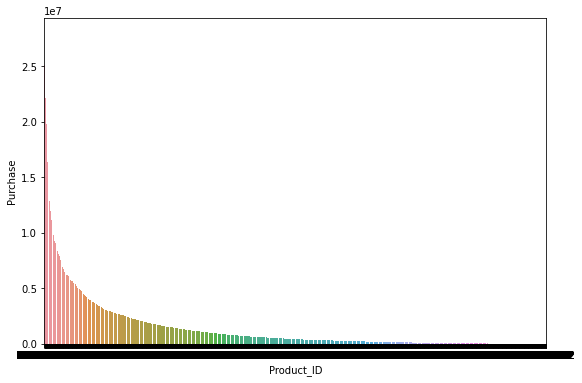

In [117]:
#Plotting productwise purchases
plt.figure(figsize=(9,6))
sns.barplot(data=df_group_pID,x='Product_ID',y='Purchase')
plt.title("Amount of purchase Vs Product in decreasing order")

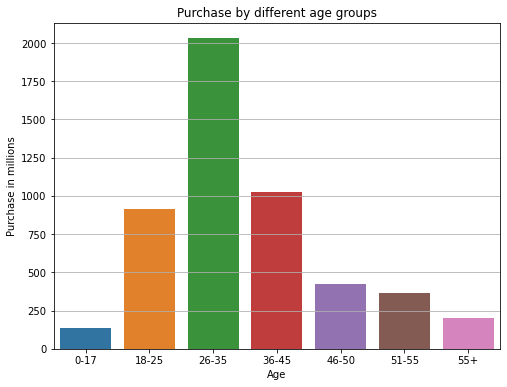

In [137]:
df_group_age = df.groupby('Age')['Purchase'].sum().reset_index()
df_group_age.Purchase/=1000000
plt.figure(figsize=(8,6))
sns.barplot(x='Age',y='Purchase',data=df_group_age)
plt.ylabel('Purchase in millions')
plt.title("Purchase by different age groups")
plt.grid(True, axis='y')

 The age group of 26=35 by far exceeds in the amount of purchasing. lets find out the number of times individual age group purchases


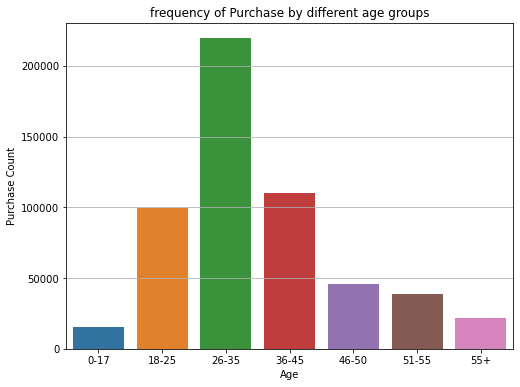

In [131]:
df_group_age_count = df.groupby('Age')['Purchase'].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Age',y='Purchase',data=df_group_age_count)
plt.ylabel('Purchase Count')
plt.title("frequency of Purchase by different age groups")
plt.grid(True, axis='y')


In [162]:
df_grouped_GA= df.groupby(['Gender', 'Age'])['Purchase'].count().reset_index()
df_grouped_GA


,Gender,Age,Purchase
0,F,0-17,5083
1,F,18-25,24628
2,F,26-35,50752
3,F,36-45,27170
4,F,46-50,13199
5,F,51-55,9894
6,F,55+,5083
7,M,0-17,10019
8,M,18-25,75032
9,M,26-35,168835


The count and total purchase plots are highly correlated. We will explore the gender dependece on purchases as well

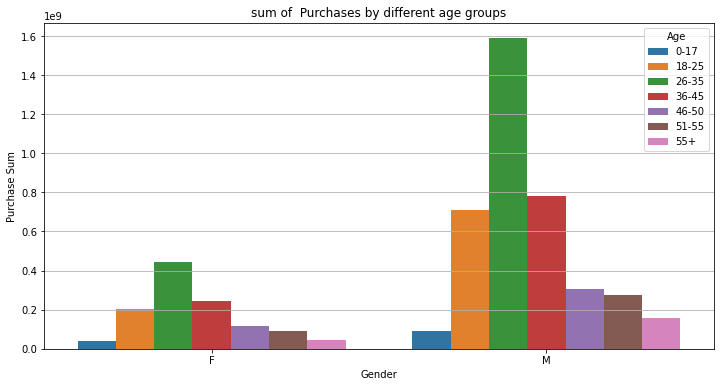

In [170]:
df_grouped_GA= df.groupby(['Gender', 'Age'])['Purchase'].sum().reset_index()#aggregating by the sum
plt.figure(figsize=(12,6))
sns.barplot(x='Gender', y='Purchase', hue='Age', data=df_grouped_GA)
plt.ylabel('Purchase Sum')
plt.title("sum of  Purchases by different age groups")
plt.grid(True, axis='y')

Text(0.5, 1.0, 'Purchase Share by Gender')

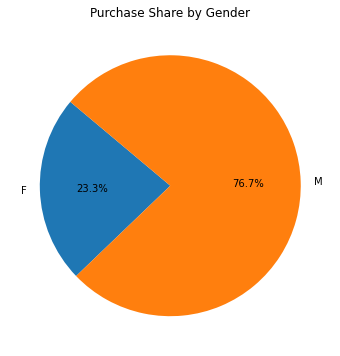

In [177]:
df_group_gender = df_grouped_GA.groupby('Gender')['Purchase'].sum()
plt.figure(figsize=(6, 6))
plt.pie(df_group_gender, labels=df_group_gender.index, autopct='%1.1f%%', startangle=140)
plt.title('Purchase Share by Gender')

It can be seen that the purchases are highly skewed towards Male. The retail company might want to think about tapping the 
potential buyers in females and design prodcuts as well as marketting strategy accordingly

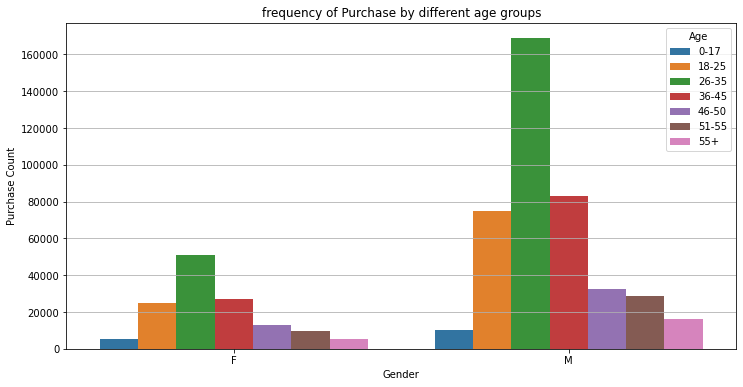

In [172]:
df_grouped_GA1= df.groupby(['Gender', 'Age'])['Purchase'].count().reset_index()#aggregating by the sum
plt.figure(figsize=(12,6))
sns.barplot(x='Gender', y='Purchase', hue='Age', data=df_grouped_GA1)
plt.ylabel('Purchase Count')
plt.title("frequency of Purchase by different age groups")
plt.grid(True, axis='y')

Text(0.5, 1.0, 'frequency of Purchase Share by Gender')

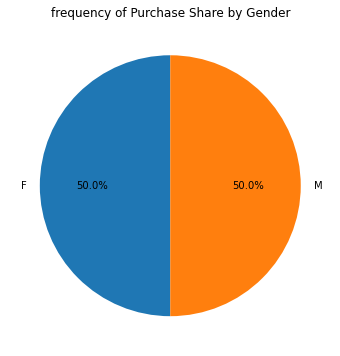

In [175]:
df_group_gender1 = df_grouped_GA.groupby('Gender')['Purchase'].count() #through count
plt.figure(figsize=(6, 6))
plt.pie(df_group_gender1, labels=df_group_gender1.index, autopct='%1.1f%%', startangle=90)
plt.title('frequency of Purchase Share by Gender')

Strangely, The frequnecy of purchase is same for male and female. That means women are buying cheaper products then men.
 Or the products of the company for men are costlier than women on average.

In [173]:
df_grouped_city=df.groupby(['City_Category','Stay_In_Current_City_Years'])['Purchase'].count().reset_index()
df_grouped_city

,City_Category,Stay_In_Current_City_Years,Purchase
0,A,0,24178
1,A,1,49305
2,A,2,27114
3,A,3,24804
4,A,4+,22319
5,B,0,28687
6,B,1,83413
7,B,2,41772
8,B,3,42691
9,B,4+,34610


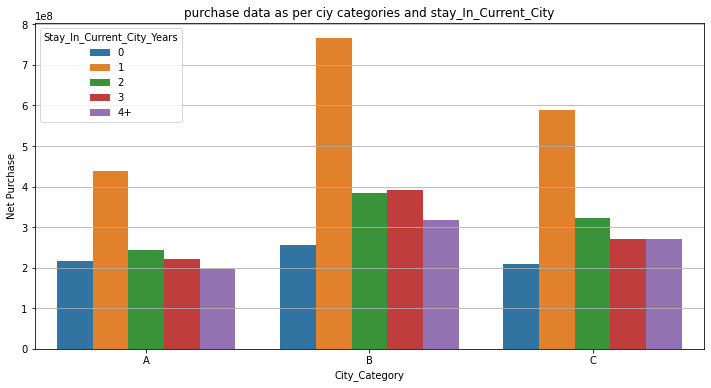

In [155]:
plt.figure(figsize=(12,6))
sns.barplot(x='City_Category', y='Purchase', hue='Stay_In_Current_City_Years', data=df_grouped_city)
plt.ylabel('Net Purchase')
plt.title("purchase data as per ciy categories and stay_In_Current_City")
plt.grid(True, axis='y')

Customers who have come to the city in last one year have purchased the most. This quntity as shown in above plot, by far exceeds 
the others, who have mmore or less same distribution
Further City_Category B has given the most purchases to the company.

In [187]:
df.groupby('Occupation')['Purchase'].sum().sort_values()[:5]

Occupation
8     14737388
9     54340046
18    60721461
13    71919481
19    73700617
Name: Purchase, dtype: int64

In [188]:
df.groupby('Occupation')['Purchase'].sum().sort_values(ascending = False)[:5]

Occupation
4     666244484
0     635406958
7     557371587
1     424614144
17    393281453
Name: Purchase, dtype: int64

Occupation levels 4,0,and 7 are the most spender who bought the prodcts where as occupation level 8 is the least spender

Now we will see which type of products have got more purchase
we had created a df named df2 consiting of all details about products

In [194]:
df2.head(20)

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,3,NaN,NaN,8370
1,P00248942,1,6.0,14.0,15200
2,P00087842,12,NaN,NaN,1422
3,P00085442,12,14.0,NaN,1057
4,P00285442,8,NaN,NaN,7969
5,P00193542,1,2.0,NaN,15227
6,P00184942,1,8.0,17.0,19215
7,P00346142,1,15.0,NaN,15854
8,P0097242,1,16.0,NaN,15686
9,P00274942,8,NaN,NaN,7871


Product_Category_1 is the primary category and one product may belong to more than one category
#So if we have to find category wise Purchase, we need to see three columns together. There are total 20 product category

In [219]:

x= df.Product_Category_1.unique() #All product categories
y= np.zeros(df.Product_Category_1.unique().shape[0]) #purchases made from the categories
k=-1
#df2.loc['Product_Category_1'] = df2.loc['Product_Category_1'].astype('float64')
for i in x:
    k=k+1
    for j in range(df2.shape[0]):
        if df2.Product_Category_1[j] ==i or df2.Product_Category_2[j]==i or df2.Product_Category_1[j] ==i:
            y[k]+= df2.Purchase[j]

print(x,y)   



[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] [2.36487490e+08 1.91001375e+09 4.38922560e+07 1.51271146e+09
 1.17868013e+09 2.89675973e+08 9.38820050e+08 5.13567779e+08
 4.11571635e+08 2.40157280e+08 1.05983985e+08 4.85036218e+08
 6.52065430e+07 5.90460334e+08 3.51964610e+07 1.48456385e+08
 1.31374099e+08 4.77983240e+07 9.44727000e+05 5.93780000e+04]


sum of y values will not match with the sum of total purchases. y represents the total purchase corresponding the product category in X


In [225]:
pp=pd.DataFrame({'Product_ID': x, 'Purchase': y})
pp['Purchase']=pp['Purchase']/1000000
pp

,Product_ID,Purchase
0,3,236.487490
1,1,1910.013754
2,12,43.892256
3,8,1512.711455
4,5,1178.680128
5,4,289.675973
6,2,938.820050
7,6,513.567779
8,14,411.571635
9,11,240.157280


Text(0, 0.5, 'Net Purchasein millions')

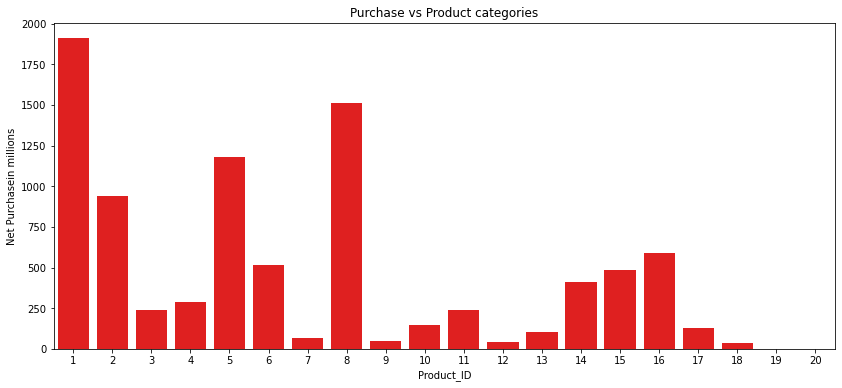

In [232]:
plt.figure(figsize=(14,6))
sns.barplot(data=pp,x='Product_ID',y='Purchase',color = 'red')
plt.title('Purchase vs Product categories')
plt.ylabel('Net Purchasein millions')

Now its clear which category has been purchased the most and whch categories aren't contributing

In [233]:
#lets find out the individual products purchase pattern:
df.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).reset_index()

,Product_ID,Purchase
0,P00025442,27995166
1,P00110742,26722309
2,P00255842,25168963
3,P00059442,24338343
4,P00184942,24334887
...,...,...
3626,P00012942,1717
3627,P00325342,1656
3628,P00353042,1545
3629,P00309042,726


Now it is clear which products are getting sold the most and which products are heating the selves only.